In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool

In [2]:
times = ['time%s' % i for i in range(1, 11)]
sites = ['site%s' % i for i in range(1, 11)]


In [3]:
train = pd.read_csv('train_sessions.csv/train_sessions.csv', index_col='session_id', parse_dates=times)
test = pd.read_csv('test_sessions.csv/test_sessions.csv', index_col='session_id', parse_dates=times)

In [4]:
# train[sites] = train[sites].fillna(0).astype('int')
# test[sites] = test[sites].fillna(0).astype('int')
train.fillna(-1, inplace=True)

# train[times] = train[times].fillna(0)
# jjjj
# test[times] = test[times].fillna(0)

C:\Users\Mikołaj\AppData\Local\Temp\ipykernel_22712\1857868172.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  train.fillna(-1, inplace=True)


In [5]:
train

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253557,3474,2013-11-25 10:26:54,3474.0,2013-11-25 10:26:58,141.0,2013-11-25 10:27:03,2428.0,2013-11-25 10:27:04,106.0,2013-11-25 10:27:13,...,2013-11-25 10:27:16,2428.0,2013-11-25 10:27:28,2428.0,2013-11-25 10:27:40,2428.0,2013-11-25 10:27:52,148.0,2013-11-25 10:27:53,0
253558,12727,2013-03-12 16:01:15,12727.0,2013-03-12 16:01:16,2215.0,2013-03-12 16:01:16,38.0,2013-03-12 16:01:17,2215.0,2013-03-12 16:01:17,...,2013-03-12 16:01:17,25444.0,2013-03-12 16:01:18,2215.0,2013-03-12 16:01:18,23.0,2013-03-12 16:01:18,21.0,2013-03-12 16:01:18,0
253559,2661,2013-09-12 14:05:03,15004.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:06:29,5562.0,2013-09-12 14:06:30,...,-1,-1.0,-1,-1.0,-1,-1.0,-1,-1.0,-1,0


In [6]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
site1,0,0.0
time6,0,0.0
time10,0,0.0
site10,0,0.0
time9,0,0.0
site9,0,0.0
time8,0,0.0
site8,0,0.0
time7,0,0.0
site7,0,0.0


In [7]:
train.describe()

,site1,time1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
count,253561.000000,253561,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000,253561.000000
mean,3243.550144,2014-01-17 19:21:10.129408768,3227.694531,3217.413999,3203.902883,3188.663895,3166.291539,3177.684257,3182.023627,3160.642090,3153.116047,0.009059
min,1.000000,2013-01-12 08:05:57,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,53.000000,2013-12-14 17:18:34,52.000000,50.000000,39.000000,39.000000,37.000000,37.000000,35.000000,35.000000,33.000000,0.000000
50%,677.000000,2014-02-17 15:14:18,660.000000,616.000000,616.000000,607.000000,570.000000,570.000000,570.000000,570.000000,570.000000,0.000000
75%,1980.000000,2014-03-20 17:17:30,1931.000000,1922.000000,1919.000000,1919.000000,1798.000000,1800.000000,1915.000000,1648.000000,1590.000000,0.000000
max,41601.000000,2014-04-30 23:39:53,41600.000000,41599.000000,41599.000000,41599.000000,41600.000000,41600.000000,41601.000000,41601.000000,41601.000000,1.000000
std,7247.006212,NaN,7267.345605,7270.121498,7262.484625,7241.171054,7213.736426,7241.278690,7252.770599,7224.077821,7219.597018,0.094747


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   site1   253561 non-null  int64         
 1   time1   253561 non-null  datetime64[ns]
 2   site2   253561 non-null  float64       
 3   time2   253561 non-null  object        
 4   site3   253561 non-null  float64       
 5   time3   253561 non-null  object        
 6   site4   253561 non-null  float64       
 7   time4   253561 non-null  object        
 8   site5   253561 non-null  float64       
 9   time5   253561 non-null  object        
 10  site6   253561 non-null  float64       
 11  time6   253561 non-null  object        
 12  site7   253561 non-null  float64       
 13  time7   253561 non-null  object        
 14  site8   253561 non-null  float64       
 15  time8   253561 non-null  object        
 16  site9   253561 non-null  float64       
 17  time9   253561 non-null  object   

In [9]:
train.dtypes


site1              int64
time1     datetime64[ns]
site2            float64
time2             object
site3            float64
time3             object
site4            float64
time4             object
site5            float64
time5             object
site6            float64
time6             object
site7            float64
time7             object
site8            float64
time8             object
site9            float64
time9             object
site10           float64
time10            object
target             int64
dtype: object

In [10]:
for i in range(1, 11):

    train['time' + str(i)] = pd.to_datetime(train['time' + str(i)])



# Extract more features from the time_j columns

for i in range(1, 11):

    train['hour' + str(i)] = train['time' + str(i)].dt.hour

    train['day_of_week' + str(i)] = train['time' + str(i)].dt.dayofweek

    train['day' + str(i)] = train['time' + str(i)].dt.day

    train['month' + str(i)] = train['time' + str(i)].dt.month

    train['year' + str(i)] = train['time' + str(i)].dt.year


# Drop the time_j columns
train.drop(['time' + str(i) for i in range(1, 11)], axis=1, inplace=True)
train.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,...,hour9,day_of_week9,day9,month9,year9,hour10,day_of_week10,day10,month10,year10
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,23,2,31,12,1969,23,2,31,12,1969
2,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0,...,11,5,22,2,2014,11,5,22,2,2014
3,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0,...,16,0,16,12,2013,16,0,16,12,2013
4,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,...,10,4,28,3,2014,10,4,28,3,2014
5,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0,...,10,4,28,2,2014,10,4,28,2,2014


In [11]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier



X = train.drop('target', axis=1)

y = train['target']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [12]:



model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)



# Check the accuracy of the model

from sklearn.metrics import accuracy_score



y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)


The accuracy of the model is:  0.994873109459113


In [13]:
# The classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50255
           1       0.89      0.49      0.63       458

    accuracy                           0.99     50713
   macro avg       0.94      0.75      0.82     50713
weighted avg       0.99      0.99      0.99     50713

[[50228    27]
 [  233   225]]


In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)

# The classification report and confusion matrix


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

The accuracy of the model is:  0.9909687851241299
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     50255
           1       0.00      0.00      0.00       458

    accuracy                           0.99     50713
   macro avg       0.50      0.50      0.50     50713
weighted avg       0.98      0.99      0.99     50713

[[50255     0]
 [  458     0]]


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

In [ ]:
coefficients = logreg.coef_.reshape(-1)


logreg_fi_df = pd.DataFrame(data = {'Feature': X.columns, 'Importance': np.abs(coefficients)}).sort_values(by = "Importance", ascending = False)
logreg_fi_df

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

The accuracy of the model is:  0.9947153589809319
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50255
           1       0.87      0.49      0.63       458

    accuracy                           0.99     50713
   macro avg       0.93      0.74      0.81     50713
weighted avg       0.99      0.99      0.99     50713

[[50221    34]
 [  234   224]]


In [16]:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

The accuracy of the model is:  0.9926251651450319
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50255
           1       0.60      0.57      0.58       458

    accuracy                           0.99     50713
   macro avg       0.80      0.79      0.79     50713
weighted avg       0.99      0.99      0.99     50713

[[50076   179]
 [  195   263]]


In [17]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

The accuracy of the model is:  0.9952674856545659
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50255
           1       0.88      0.55      0.68       458

    accuracy                           1.00     50713
   macro avg       0.94      0.78      0.84     50713
weighted avg       0.99      1.00      0.99     50713

[[50220    35]
 [  205   253]]


In [20]:
# model = CatBoostClassifier()
# train_pool = Pool(X_train, y_train)
# test_pool = Pool(X_test, y_test)

# # Train CatBoostClassifier
# model = CatBoostClassifier(iterations=500, learning_rate=0.1, loss_function='MultiClass',eval_metric='F1' , verbose=0)
# model.fit(train_pool, )

# # Evaluate metrics
# metrics = model.eval_metrics(test_pool)
# metricss = model.evals_result_
# print(metricss)


CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/libs/metrics/metric.cpp:6583: Eval metric should have a single value. Metric F1 provides a value for each class, thus it cannot be used as a single value to select best iteration or to detect overfitting. If you just want to look on the values of this metric use custom_metric parameter.

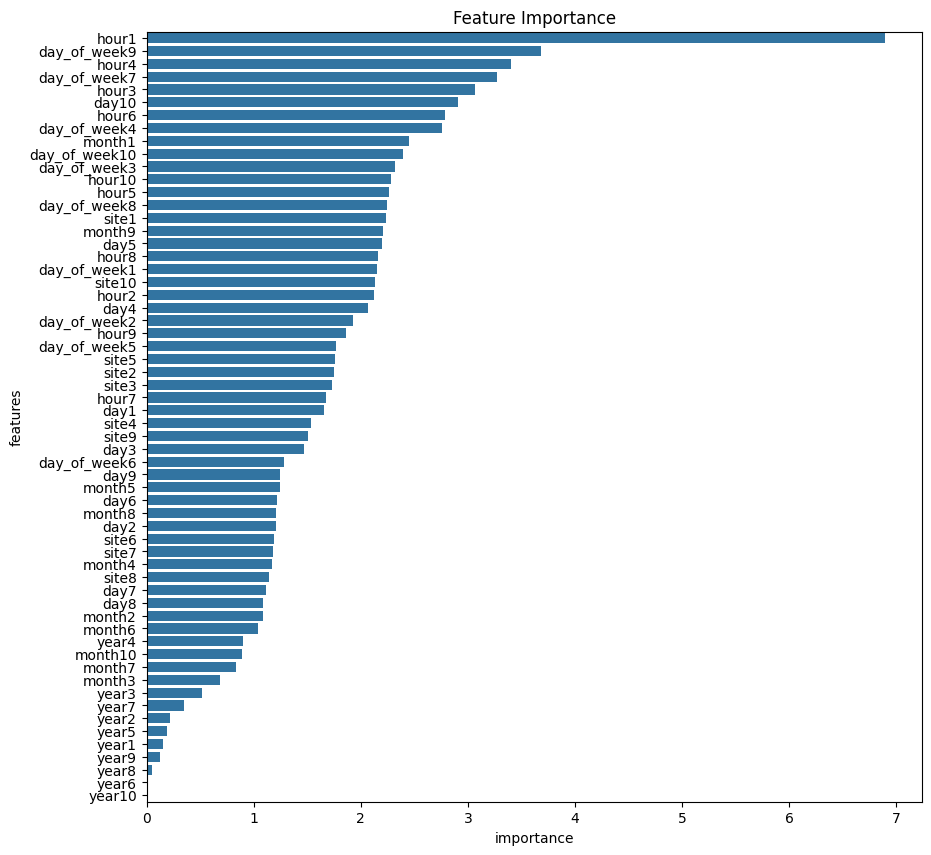

In [ ]:
feature_importance = model.feature_importances_

features = X.columns

feature_importance_df = pd.DataFrame({'features': features, 'importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)



plt.figure(figsize=(10, 10))

sns.barplot(x='importance', y='features', data=feature_importance_df)

plt.title('Feature Importance')

plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# The classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50255
           1       0.87      0.62      0.72       458

    accuracy                           1.00     50713
   macro avg       0.93      0.81      0.86     50713
weighted avg       1.00      1.00      1.00     50713

[[50214    41]
 [  176   282]]
